## Loading Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import spacy
import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist




import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# import genism

## Loading Data

In [3]:
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Cleaning textual Data

### Removing url

In [5]:
def clean_url(sentence):
    return re.sub(r'http\S+', '', sentence)

### Spell Correcter

In [6]:
# def spell_correction(sentence):
#     return ''.join(TextBlob(sentence).correct())

### Removing all irrelevant (Punctualtions and Numbers)

In [7]:
def remove_non_alpha_numeric(sentence):
    return re.sub('[^a-zA-Z]', ' ', sentence)

### Convering words to lowercase

In [8]:
def lower(sentence):
    return sentence.lower()

### Tokenization

In [9]:
def token(sentence):
    return word_tokenize(sentence)

### Removing Stopword

In [10]:
# stopwords.words('english')

def remove_stop_words(tokenised_sentence):
    stopwords1 = [x for x in stopwords.words('english') if 't' not in x]
    return [x for x in tokenised_sentence if x not in stopwords1]

### Lemitization and removing short words (length <=2)

In [11]:
lemma = WordNetLemmatizer()
def lemmati(tokenised_sentence):
    return [lemma.lemmatize(word = x, pos = 'v') for x in tokenised_sentence
            if len(x)>1
           ]
    
    

### Converting back to string

In [12]:
def back_to_string(tokenised_sentence):
    return ' '.join(tokenised_sentence)
    

### Applying functions altogather to preprocess once

In [13]:
# Applying preprocessing
def preprocess(train_df):
    train_df['clean_text'] = train_df['text'].apply(clean_url)
#     train_df['clean_text'] = train_df['clean_text'].apply(spell_correction)
    train_df['clean_text'] = train_df['clean_text'].apply(remove_non_alpha_numeric)
    train_df['clean_text'] = train_df['clean_text'].apply(lower)
    train_df['clean_text'] = train_df['clean_text'].apply(token)
    train_df['clean_text'] = train_df['clean_text'].apply(remove_stop_words)
    train_df['clean_text'] = train_df['clean_text'].apply(lemmati)
    train_df['clean_text'] = train_df['clean_text'].apply(back_to_string)
    return train_df

In [14]:
train_df = preprocess(train_df)
# test_df = preprocess(test_df)

In [15]:
os.getcwd()

'D:\\PROJECTS\\Kaggle - Disaster tweet NLP'

In [16]:
os.listdir('D:\\PROJECTS\\Kaggle - Disaster tweet NLP\\Data')

['modified', 'sample_submission.csv', 'test.csv', 'train.csv']

In [17]:
# train_df.to_csv('D:\\PROJECTS\\Kaggle - Disaster tweet NLP\\Data\\modified\\train1.csv')

In [18]:
# train_df = pd.read_csv('D:\\PROJECTS\\Kaggle - Disaster tweet NLP\\Data\\modified\\train1.csv')

In [19]:
train_df['text'].iloc[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

### Removing rare words

In [20]:
def most_rare_word_func(text, n_words=5, till = None):
    '''
    Returns the most rarely used words from a text
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        List of the most rarely occurring words (by default = 5)
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)
    
    n_words = n_words
    most_rare_words_list = list(df_fdist['Word'][-n_words:])
    
    plt.figure(figsize=(11,7))
    plt.bar(df_fdist['Word'][-n_words:till], 
            df_fdist['Frequency'][-n_words:till])

    plt.xticks(rotation = 45)

    plt.xlabel('Least common Words')
    plt.ylabel("Frequency")
    plt.title("Frequency distribution of the 10 least common words")

    plt.show()
    
    return most_rare_words_list

In [21]:
join_t = train_df['clean_text'].str.cat(sep= ' ')

In [22]:
len(np.unique(join_t.split(" ")))

14165

## EDA

In [24]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [27]:
train_df['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

### Utility Function

In [55]:
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class)) 
  print() 
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  print()
  print('Area under Precision-Recall curve:', lr_f1)
  
  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc



def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model


### SVC

In [325]:
# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, min_df=0.001, ngram_range=(1,3), smooth_idf=True)
vectorizer.fit(train_df.clean_text)
X_tf_idf= vectorizer.transform(train_df.clean_text)

In [326]:
X_tf_idf.toarray().shape

(7613, 2748)

In [327]:

x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, train_df['target'], random_state=42)

In [365]:
SVM.get_params

<bound method BaseEstimator.get_params of SVC(C=0.8, degree=7, kernel='poly', probability=True)>

Train confusion matrix is: 
[[3044  207]
 [ 664 1794]]

Test confusion matrix is: 
[[976 115]
 [275 538]]

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1091
           1       0.82      0.66      0.73       813

    accuracy                           0.80      1904
   macro avg       0.80      0.78      0.78      1904
weighted avg       0.80      0.80      0.79      1904


Train accuracy score:  0.8474338763356104
Test accuracy score:  0.7951680672268907

Train ROC-AUC score:  0.9184124106271113
Test ROC-AUC score:  0.8553320638614269

Are under Precision-Recall curve: 0.7339699863574353
Area under ROC-AUC: 0.8335349263469524


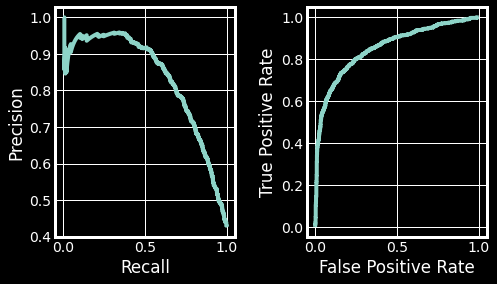

In [372]:
SVM = svm.SVC( probability=True, C=0.5, kernel='poly', degree=1, coef0=10, shrinking=True, random_state=0, 
             )
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(SVM, x_train, x_test, y_train, y_test)

In [324]:
def predict(data, Mod):
    data = preprocess(data)
    X_tf_idf= vectorizer.transform(data.clean_text)
    
    pred_y = Mod.predict(X_tf_idf)
    data['target'] = pred_y
    return data[['id', 'target']]

In [373]:
k = predict(test_df, SVM)


In [377]:
# k.to_csv('SVM.csv', index = False)

In [61]:
# Tuning the hyperparameters
parameters ={
    "C":[0.1, 1, 10, 100, 1000],
    "kernel":['rbf', 'sigmoid', 'poly'],
    "gamma" = [0.1, 1, 10, 100],
    "degree" = [0, 1, 2, 3, 4, 5, 6]
}



svm_optimal = grid_search(svm.SVC(probability=True), parameters,x_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.5s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   4.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   4.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   3.9s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   3.9s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   3.7s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   3.6s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   4.7s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   4.6s
[CV] END .................C=0.5, gamma=scale, kernel=sigmoid; total time=   3.8s
[CV] END .................C=0.5, gamma=scale, ke

Train confusion matrix is: 
[[3130  121]
 [ 693 1765]]

Test confusion matrix is: 
[[1011   80]
 [ 300  513]]

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1091
           1       0.87      0.63      0.73       813

    accuracy                           0.80      1904
   macro avg       0.82      0.78      0.79      1904
weighted avg       0.81      0.80      0.79      1904


Train accuracy score:  0.8574181117533719
Test accuracy score:  0.8004201680672269

Train ROC-AUC score:  0.9365674929088603
Test ROC-AUC score:  0.8589600928089941

Are under Precision-Recall curve: 0.7297297297297297
Area under ROC-AUC: 0.8417639408397153


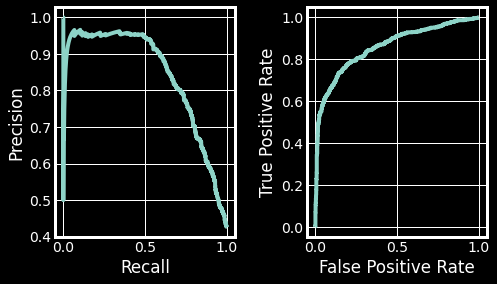

In [62]:
so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc = check_scores(svm_optimal,x_train, x_test, y_train, y_test)

### MultinomialNB

Train confusion matrix is: 
[[3154   97]
 [ 553 1905]]

Test confusion matrix is: 
[[1000   91]
 [ 276  537]]

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1091
           1       0.86      0.66      0.75       813

    accuracy                           0.81      1904
   macro avg       0.82      0.79      0.80      1904
weighted avg       0.81      0.81      0.80      1904


Train accuracy score:  0.8861446838325451
Test accuracy score:  0.8072478991596639

Train ROC-AUC score:  0.9565813635861934
Test ROC-AUC score:  0.8531758782299097

Are under Precision-Recall curve: 0.7453157529493408
Area under ROC-AUC: 0.8541702060848991


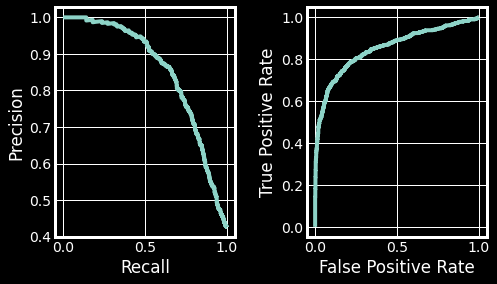

In [63]:
m_train_accuracy, m_test_accuracy, m_train_auc, m_test_auc = check_scores(MultinomialNB(),x_train, x_test, y_train, y_test)

### Gaussian NB

Train confusion matrix is: 
[[2682  569]
 [   0 2458]]

Test confusion matrix is: 
[[523 568]
 [168 645]]

              precision    recall  f1-score   support

           0       0.76      0.48      0.59      1091
           1       0.53      0.79      0.64       813

    accuracy                           0.61      1904
   macro avg       0.64      0.64      0.61      1904
weighted avg       0.66      0.61      0.61      1904


Train accuracy score:  0.9003328078472587
Test accuracy score:  0.6134453781512605

Train ROC-AUC score:  0.9124884650876653
Test ROC-AUC score:  0.6363673260930593

Are under Precision-Recall curve: 0.6367226061204343
Area under ROC-AUC: 0.7066663582837759


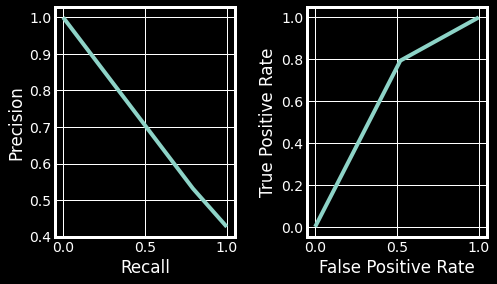

In [64]:
g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc=check_scores(GaussianNB(),x_train.toarray(), x_test.toarray(), y_train, y_test)

### Adaboost

Train confusion matrix is: 
[[2878  373]
 [ 961 1497]]

Test confusion matrix is: 
[[932 159]
 [343 470]]

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1091
           1       0.75      0.58      0.65       813

    accuracy                           0.74      1904
   macro avg       0.74      0.72      0.72      1904
weighted avg       0.74      0.74      0.73      1904


Train accuracy score:  0.766333858819408
Test accuracy score:  0.7363445378151261

Train ROC-AUC score:  0.7915292509358703
Test ROC-AUC score:  0.7552326256534792

Are under Precision-Recall curve: 0.651872399445215
Area under ROC-AUC: 0.7710604013859716


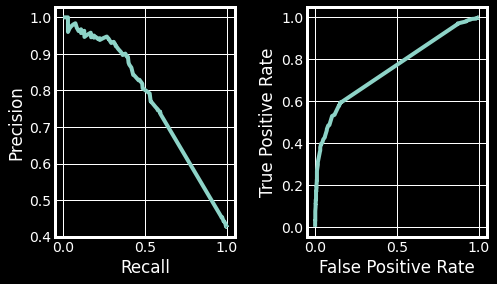

In [65]:
a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc=check_scores(AdaBoostClassifier(),x_train,x_test, y_train, y_test)

In [66]:
params = {'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

ada_optimal_model = grid_search(AdaBoostClassifier(), params,x_train, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   1.6s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   1.7s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   3.5s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   3.4s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=  17.3s
[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=  17.0s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=10; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.001, n_estimators=50; total time=   1.6s
[CV] END algor

Train confusion matrix is: 
[[3100  151]
 [ 998 1460]]

Test confusion matrix is: 
[[1009   82]
 [ 369  444]]

              precision    recall  f1-score   support

           0       0.73      0.92      0.82      1091
           1       0.84      0.55      0.66       813

    accuracy                           0.76      1904
   macro avg       0.79      0.74      0.74      1904
weighted avg       0.78      0.76      0.75      1904


Train accuracy score:  0.7987388334209143
Test accuracy score:  0.7631302521008403

Train ROC-AUC score:  0.8908055830101974
Test ROC-AUC score:  0.8098137168356103

Are under Precision-Recall curve: 0.6631814787154593
Area under ROC-AUC: 0.8036641011526946


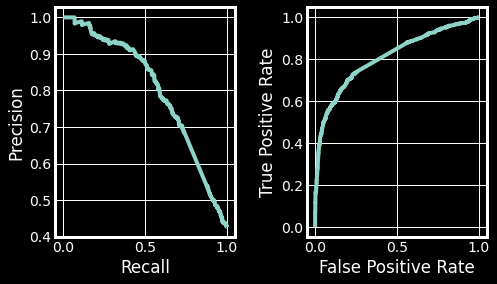

In [67]:
ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc=check_scores(ada_optimal_model,x_train,x_test, y_train, y_test)

### Random Forest

Train confusion matrix is: 
[[3234   17]
 [  53 2405]]

Test confusion matrix is: 
[[974 117]
 [296 517]]

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1091
           1       0.82      0.64      0.71       813

    accuracy                           0.78      1904
   macro avg       0.79      0.76      0.77      1904
weighted avg       0.79      0.78      0.78      1904


Train accuracy score:  0.9877386582588895
Test accuracy score:  0.7830882352941176

Train ROC-AUC score:  0.9989262238645229
Test ROC-AUC score:  0.8488578698802569

Are under Precision-Recall curve: 0.7145818935729095
Area under ROC-AUC: 0.8413554324670927


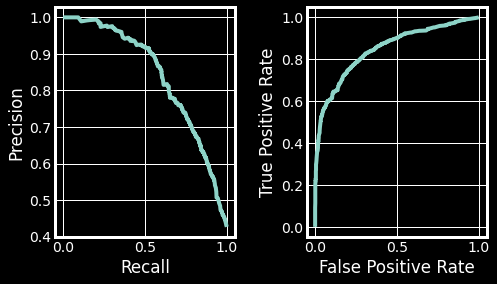

In [70]:
r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc= check_scores(RandomForestClassifier(random_state=0).fit(x_train, y_train), x_train,x_test,y_train,y_test)

## Final Results

In [72]:
data = [('Random Forest', r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc),
 ('MultinomialNB',m_train_accuracy, m_test_accuracy, m_train_auc, m_test_auc  ),
# ('Bagged MultinomialNB',b_train_accuracy, b_test_accuracy, b_train_auc, b_test_auc ),
 ('AdaBoost',a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc ),
('AdaBoost Optimized',ao_train_accuracy, ao_test_accuracy, ao_train_auc, ao_test_auc),
('Gaussian Naive Bayes',g_train_accuracy, g_test_accuracy, g_train_auc, g_test_auc),
('SVM', s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc),
('SVM Optimized', so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc),
# ('LSTM',train_acc_lstm, test_acc_lstm, train_roc_lstm, test_roc_lstm )
       ]


Scores_ =pd.DataFrame(data = data, columns=['Model Name','Train Accuracy', 'Test Accuracy', 'Train ROC', 'Test ROC'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Train Accuracy,Test Accuracy,Train ROC,Test ROC
Model Name,,,,
Random Forest,0.987739,0.783088,0.998926,0.848858
MultinomialNB,0.886145,0.807248,0.956581,0.853176
AdaBoost,0.766334,0.736345,0.791529,0.755233
AdaBoost Optimized,0.798739,0.763130,0.890806,0.809814
Gaussian Naive Bayes,0.900333,0.613445,0.912488,0.636367
SVM,0.965143,0.802521,0.991483,0.858459
SVM Optimized,0.857418,0.800420,0.936567,0.858960


### ExtraTree Clssifier

In [207]:
from sklearn.ensemble import ExtraTreesClassifier

In [209]:
train_df

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds the reason this earthquake may allah for...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents ask to shelter place notify officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation order cali...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just get send this photo ruby alaska smoke wil...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridge collapse into near...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,aria ahrary thetawniest the out control wild f...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utc km volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate after bike collide with car...


In [213]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [239]:
Mod = ExtraTreesClassifier(
#     min_impurity_decrease = 0.2,
                           max_features= 20, min_samples_split=20, n_estimators=700,
                           random_state=0)
Mod.fit(x_train, y_train)

ExtraTreesClassifier(max_features=20, min_samples_split=20, n_estimators=700,
                     random_state=0)

In [240]:
train_accuracy = accuracy_score(y_train,Mod.predict(x_train))
test_accuracy = accuracy_score(y_test,Mod.predict(x_test))

print("Train accuracy score: ", train_accuracy)
print("Test accuracy score: ",test_accuracy )
print()

Train accuracy score:  0.9826589595375722
Test accuracy score:  0.7956932773109243



In [235]:
params = {'n_estimators': [100],
          'min_samples_split':[10, 20, 50],
          'max_features': [10, 50, 500]}

ext_optimal_model = grid_search(ExtraTreesClassifier(), params,x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END max_features=10, min_samples_split=10, n_estimators=100; total time=  12.2s
[CV] END max_features=10, min_samples_split=10, n_estimators=100; total time=  11.8s
[CV] END max_features=10, min_samples_split=20, n_estimators=100; total time=  11.8s
[CV] END max_features=10, min_samples_split=20, n_estimators=100; total time=  11.3s
[CV] END max_features=10, min_samples_split=50, n_estimators=100; total time=  11.7s
[CV] END max_features=10, min_samples_split=50, n_estimators=100; total time=  11.2s
[CV] END max_features=50, min_samples_split=10, n_estimators=100; total time=   9.9s
[CV] END max_features=50, min_samples_split=10, n_estimators=100; total time=   9.3s
[CV] END max_features=50, min_samples_split=20, n_estimators=100; total time=   9.7s
[CV] END max_features=50, min_samples_split=20, n_estimators=100; total time=   9.0s
[CV] END max_features=50, min_samples_split=50, n_estimators=100; total time=   9.7s
[CV] 

In [236]:
train_accuracy = accuracy_score(y_train,ext_optimal_model.predict(x_train))
test_accuracy = accuracy_score(y_test,ext_optimal_model.predict(x_test))

print("Train accuracy score: ", train_accuracy)
print("Test accuracy score: ",test_accuracy )
print()

Train accuracy score:  0.978104746890874
Test accuracy score:  0.789390756302521



In [248]:
def predict(data, Mod):
    data = preprocess(data)
    X_tf_idf= vectorizer.transform(data.clean_text)
    
    pred_y = Mod.predict(X_tf_idf)
    data['target'] = pred_y
    return data[['id', 'target']]

# ex_test = predict(test_df, Mod)


# ex_test.to_csv('extratree.csv', index = False)

### XGBoost

In [242]:
!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [243]:
from xgboost import XGBClassifier


In [289]:
xg = XGBClassifier(random_state = 0, learning_rate=1.1
                   , max_depth=3, n_estimators=200, max_bin = 25,
                  grow_policy = 'lossguide', gamma = 0.01)

xg.fit(x_train, y_train)
print()
train_accuracy = accuracy_score(y_train,xg.predict(x_train))
test_accuracy = accuracy_score(y_test,xg.predict(x_test))

print("Train accuracy score: ", train_accuracy)
print("Test accuracy score: ",test_accuracy )


Train accuracy score:  0.9278332457523208
Test accuracy score:  0.7673319327731093


In [249]:
xg_test = predict(test_df, xg)
xg_test.to_csv('xg_boost.csv', index = False)

## Stacking Models (MultinomialNB,  RF, Ada, SVM Optimised)


In [75]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_df
 x_train,x_test,y_train,y_test

In [81]:
rf_mo = RandomForestClassifier(random_state=0).fit(x_train, y_train)
ada_mo = ada_optimal_model.fit(x_train, y_train)
gaus_mo = GaussianNB().fit(x_train.toarray(), y_train)
mul_mo = MultinomialNB().fit(x_train, y_train)
svc_mo = svm.SVC( probability=True).fit(x_train, y_train)

In [162]:
def predict1(x_test):
    df= pd.DataFrame()

    
    
    df['rf_pred_y'] = rf_mo.predict(x_test)
    df['ada_pred_y'] = ada_mo.predict(x_test)
    df['gaus_pred_y'] = gaus_mo.predict(x_test.toarray())
    df['mul_pred_y'] = mul_mo.predict(x_test)
    df['svc_pred_y'] = svc_mo.predict(x_test)

#     pred_y = np.where(val_y>0.5, 1, 0)
    df['cum_y'] = df[['rf_pred_y', 'ada_pred_y', 'gaus_pred_y', 'mul_pred_y', 'svc_pred_y']].sum(axis=1)
    df['pred_y'] = np.where((df['cum_y']>2), 1, 0)
    df['actual'] = y_test.reset_index(drop =True)
    
    
    return df

In [163]:
%%time
stacked_result = predict1(x_test)

CPU times: total: 2.17 s
Wall time: 2.15 s


In [164]:
print('Test confusion matrix is: ',)
print(confusion_matrix(stacked_result['actual'], stacked_result['pred_y']))

Test confusion matrix is: 
[[1008   83]
 [ 292  521]]


In [165]:
print("Train accuracy score: ", accuracy_score(stacked_result['actual'], stacked_result['pred_y']))

Train accuracy score:  0.803046218487395


In [319]:
def predict2(x_test, num_mod = 2):
    df= pd.DataFrame()

    
    
    df['rf_pred_y'] = rf_mo.predict(x_test)
    df['ada_pred_y'] = ada_mo.predict(x_test)
    df['gaus_pred_y'] = gaus_mo.predict(x_test.toarray())
    df['mul_pred_y'] = mul_mo.predict(x_test)
    df['svc_pred_y'] = svc_mo.predict(x_test)
    df['xg_pred_y'] = xg.predict(x_test)
    df['ex_pred_y'] = Mod.predict(x_test)
#     pred_y = np.where(val_y>0.5, 1, 0)
    df['cum_y'] = df[['rf_pred_y', 'ada_pred_y', 'gaus_pred_y', 'mul_pred_y', 'svc_pred_y', 'xg_pred_y',
                      'ex_pred_y']].sum(axis=1)
    df['pred_y'] = np.where((df['cum_y']>num_mod), 1, 0)
#     df['actual'] = y_test.reset_index(drop =True)
    
    
    return df['pred_y']

In [320]:
def predict(data, num_mod):
    data = preprocess(data)
    X_tf_idf= vectorizer.transform(data.clean_text)
    
    pred_y = predict2(X_tf_idf, num_mod)
    data['target'] = pred_y
    return data[['id', 'target']]
    
    
    

In [321]:
g = predict(test_df, 4)

In [322]:
g['target'].value_counts()

0    2343
1     920
Name: target, dtype: int64

In [308]:
g['target'].value_counts()

0    2067
1    1196
Name: target, dtype: int64

In [323]:
# Saving Output of Stacked models

g.to_csv('Stacked_output 3.csv', index= False)

### LSTM Model Training

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D, Dropout, Bidirectional

tf.random.set_seed(7)
from termcolor import colored

In [17]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [20]:
print(colored("Tokenizing and padding data", "red"))

tokenizer = Tokenizer(
#     num_words = 2000, 
    split = ' ')

tokenizer.fit_on_texts(train_df['clean_text'].astype(str).values)


train_tweets1 = tokenizer.texts_to_sequences(train_df['clean_text'].astype(str).values)

# max_len = max([len(i) for i in train_tweets1])
max_len = 25

train_tweets = pad_sequences(train_tweets1, maxlen = 25, padding= 'pre')

# test_tweets = tokenizer.texts_to_sequences(test_df['clean_text'].astype(str).values)

# test_tweets = pad_sequences(test_tweets, maxlen = max_len)

# print(colored("Tokenizing and padding complete", "red"))

Tokenizing and padding data


## Training

In [26]:
train_tweets1[0]

[3754, 1, 493, 7, 240, 99, 1380, 1845, 56]

In [27]:
train_tweets[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 3754,    1,  493,    7,  240,   99,
       1380, 1845,   56])

In [28]:
train_tweets.shape

(7613, 25)

In [21]:
train_X = train_tweets[:6500]
validation_X = train_tweets[6500:]
train_y = train_df['target'][:6500]
validation_y = train_df['target'][6500:]

## Model Training

### Word Embedding

In [30]:
# vocab_size = 15000
# dim_size = 100
# max_length = 21
# # Building the model
# print(colored("Creating the Word2Vec model", "yellow"))
# vec = Sequential()
# vec.add(Embedding(input_dim = vocab_size, output_dim= dim_size))
# vec.summary()        


### Training

In [31]:
import gc

### Training for multiple iterations


In [ ]:
del model, train, val
gc.collect()

In [38]:
# collect data across multiple repeats
iterations = 3
epo = 4

vocab_size = 15000
dim_size = 10
max_length = 25

train_loss = pd.DataFrame()
val_loss = pd.DataFrame()

train_accuracy = pd.DataFrame()
val_accuracy = pd.DataFrame()

for i in range(iterations):
    model = Sequential()
    model.add(Embedding(input_dim = vocab_size, output_dim= dim_size, input_length = max_length))
    model.add(Dropout(0.2))
#     model.add(LSTM(units =264, activation = 'tanh', recurrent_dropout = 0.2, return_sequences = True))
#     model.add(Dropout(0.5))
    model.add(LSTM(units = 128, activation='tanh', recurrent_dropout = 0.6, return_sequences=True))
#     model.add(Dropout(0.7))
    model.add(LSTM(units = 64, activation = 'tanh', recurrent_dropout = 0.7
#                    , return_sequences= True
                  ))

#     model.add(LSTM(units =16, activation = LeakyReLU(alpha=0.1)))
    model.add(Dropout(0.2))
    model.add(Dense(units = 16, activation= LeakyReLU(alpha=0.3)))
#     model.add(Dropout(0.2))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

    # fit model
    history = model.fit(train_X, train_y, epochs = epo, batch_size = 128,
#                     validation_data= (validation_X, validation_y),
                        shuffle=False,
                   validation_split = 0.3
                       )
    
    # story history
    train_loss[str(i)] = history.history['loss']
    val_loss[str(i)] = history.history['val_loss']
    
    train_accuracy[str(i)] = history.history['accuracy']
    val_accuracy[str(i)] = history.history['val_accuracy']


Epoch 1/4
36/36 [==============================] - 15s 273ms/step - loss: 0.6852 - accuracy: 0.5758 - val_loss: 0.6803 - val_accuracy: 0.5810
Epoch 2/4
36/36 [==============================] - 10s 277ms/step - loss: 0.6676 - accuracy: 0.5998 - val_loss: 0.6586 - val_accuracy: 0.7113
Epoch 3/4
36/36 [==============================] - 10s 273ms/step - loss: 0.5654 - accuracy: 0.7991 - val_loss: 0.7124 - val_accuracy: 0.6133
Epoch 4/4
36/36 [==============================] - 10s 270ms/step - loss: 0.3314 - accuracy: 0.8668 - val_loss: 0.5913 - val_accuracy: 0.7303
Epoch 1/4
36/36 [==============================] - 17s 342ms/step - loss: 0.6857 - accuracy: 0.5774 - val_loss: 0.6794 - val_accuracy: 0.5810
Epoch 2/4
36/36 [==============================] - 10s 281ms/step - loss: 0.6663 - accuracy: 0.5969 - val_loss: 0.6540 - val_accuracy: 0.7174
Epoch 3/4
36/36 [==============================] - 10s 280ms/step - loss: 0.5973 - accuracy: 0.7851 - val_loss: 0.5659 - val_accuracy: 0.7297
Epoch 

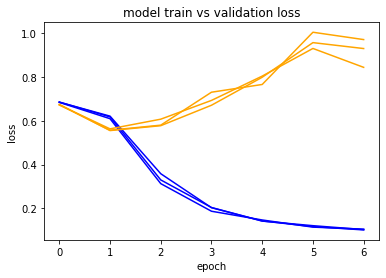

In [34]:
# plot train and validation loss across multiple runs
plt.plot(train_loss, color='blue', label='train')
plt.plot(val_loss, color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

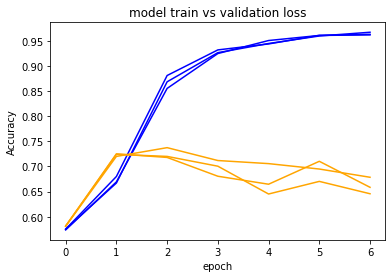

In [35]:
    
# plot train and validation loss across multiple runs
plt.plot(train_accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

### ModelWrapper

In [43]:
import pickle as pkl

In [ ]:
os('/Models').list

In [50]:
# pd.to_pickle(tokenizer,'tok.pkl' )

In [53]:
# model.save('LSTM.h5')

In [78]:
preprocess(test_df)

,id,keyword,location,text,clean_text
0,0,NaN,NaN,Just happened a terrible car crash,just happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear about earthquake different cities stay sa...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there forest fire at spot pond geese flee acro...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fasteners...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri worse than last hurricane city amp ot...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo


In [ ]:
tok = open("tok.pkl", "rb")
tokenizer = pkl.load(tok
data = preprocess(data)

In [47]:
os.listdir('Models/LSTM')

['model.pkl', 'test.csv', 'tok.pkl']

In [50]:
'Models'+'/' + 'LSTM'+ '/' + 'tok.pkl'

'Models/LSTM/tok.pkl'

In [63]:
dire = 'LSTM'
path = 'Models'+'/' + dire
tok_path = path+ '/'+'LSTM.h5'
# tok = open(path+'tok.pkl', "rb")
tok_path

'Models/LSTM/LSTM.h5'

In [71]:
def predict(data, dire):
    import pickle as pkl
    path = 'Models'+'/' + dire
    tok = open(path+ '/'+'tok.pkl', "rb")
    tokenizer = pkl.load(tok)
    data = preprocess(data)

    train_tweets1 = tokenizer.texts_to_sequences(data['clean_text'].astype(str).values)

    # max_len = max([len(i) for i in train_tweets1])
    max_len = 25

    train_tweets = pad_sequences(train_tweets1, maxlen = 25, padding= 'pre')
    
    #     Model
    
    new_model = tf.keras.models.load_model('LSTM.h5')
    
    val_y = new_model.predict(train_tweets)

    pred_y = np.where(val_y>0.5, 1, 0)
    
    data['target'] = pred_y
    
    
    return data[['id', 'target']]
    
    
    

In [70]:
os.listdir('Models\LSTM')

['LSTM.pkl', 'test.csv', 'tok.pkl']

In [72]:
test = predict(test_df, 'LSTM')
# test.to_csv('test.csv', index = False)

### BI-Directional LSTM

In [32]:
import gc
del model
# , train_loss, val_loss, train_accuracy, val_accuracy
gc.collect()

316536

In [33]:
# collect data across multiple repeats
iterations = 4
epo = 3

vocab_size = 15000
dim_size = 20
max_length = 25

train_loss = pd.DataFrame()
val_loss = pd.DataFrame()

train_accuracy = pd.DataFrame()
val_accuracy = pd.DataFrame()

for i in range(iterations):
    model = Sequential()
    model.add(Embedding(input_dim = vocab_size, output_dim= dim_size, input_length = max_length))
#     model.add(Dropout(0.2))
#     model.add(LSTM(units =264, activation = 'tanh', recurrent_dropout = 0.2, return_sequences = True))
#     model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(units = 128, activation='tanh', return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 64, activation = 'tanh'
#                    , return_sequences= True
                  ))

#     model.add(LSTM(units =16, activation = LeakyReLU(alpha=0.1)))
    model.add(Dropout(0.2))
    model.add(Dense(units = 16, activation= LeakyReLU(alpha=0.3)))
#     model.add(Dropout(0.2))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

    # fit model
    history = model.fit(train_X, train_y, epochs = epo, batch_size = 128,
#                     validation_data= (validation_X, validation_y),
                        shuffle=False,
                   validation_split = 0.3
                       )
    
    # story history
    train_loss[str(i)] = history.history['loss']
    val_loss[str(i)] = history.history['val_loss']
    
    train_accuracy[str(i)] = history.history['accuracy']
    val_accuracy[str(i)] = history.history['val_accuracy']


Epoch 1/3
36/36 [==============================] - 7s 55ms/step - loss: 0.6844 - accuracy: 0.5769 - val_loss: 0.6748 - val_accuracy: 0.5810
Epoch 2/3
36/36 [==============================] - 1s 19ms/step - loss: 0.5468 - accuracy: 0.7246 - val_loss: 0.6051 - val_accuracy: 0.7169
Epoch 3/3
36/36 [==============================] - 1s 19ms/step - loss: 0.2924 - accuracy: 0.8923 - val_loss: 0.6129 - val_accuracy: 0.6928
Epoch 1/3
36/36 [==============================] - 8s 54ms/step - loss: 0.6851 - accuracy: 0.5747 - val_loss: 0.6783 - val_accuracy: 0.5851
Epoch 2/3
36/36 [==============================] - 1s 19ms/step - loss: 0.5489 - accuracy: 0.7336 - val_loss: 0.5707 - val_accuracy: 0.7082
Epoch 3/3
36/36 [==============================] - 1s 19ms/step - loss: 0.3066 - accuracy: 0.8916 - val_loss: 0.5903 - val_accuracy: 0.7205
Epoch 1/3
36/36 [==============================] - 8s 57ms/step - loss: 0.6848 - accuracy: 0.5719 - val_loss: 0.6763 - val_accuracy: 0.5810
Epoch 2/3
36/36 [===

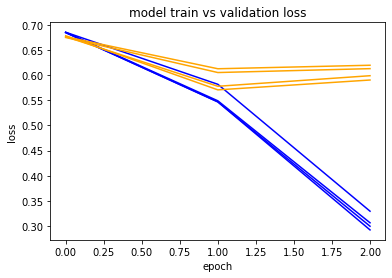

In [34]:
# plot train and validation loss across multiple runs
plt.plot(train_loss, color='blue', label='train')
plt.plot(val_loss, color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

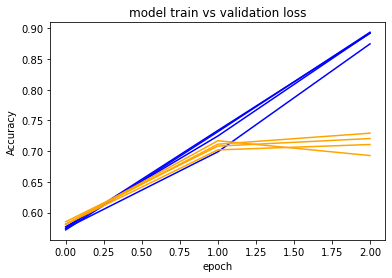

In [35]:
# plot train and validation loss across multiple runs
plt.plot(train_accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [36]:
model.save('BI-LSTM.h5')

### Testing

In [40]:
# test_df = pd.read_csv('Data/test.csv')

In [ ]:
tok = open("tok.pkl", "rb")
tokenizer = pkl.load(tok)
data = preprocess(data)

In [44]:
import os
os.listdir('Models/BI-LSTM')

['model.h5', 'test.csv', 'tok.pkl']

In [73]:
test_df

,id,keyword,location,text,clean_text,target
0,0,NaN,NaN,Just happened a terrible car crash,just happen terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",hear about earthquake different cities stay sa...,1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there forest fire at spot pond geese flee acro...,1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light spokane wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,1
...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fasteners...,1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri worse than last hurricane city amp ot...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,0
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo,1


In [76]:
os.listdir('Models/BI-LSTM')

['model.h5', 'test.csv', 'tok.pkl']

In [78]:
test = predict(test_df, 'BI-LSTM')
test.to_csv('Models/BI-LSTM/test.csv', index = False)

In [532]:
len(np.unique(join_t.split(" ")))

14165

In [36]:
train_df[5000:5001]

,id,keyword,location,text,target,clean_text
5000,7132,military,NY,13 reasons why we love women in the military ...,0,reason love women the military lulgzimbestpicts


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
val_y = model.predict(validation_X)

pred_y = np.where(model.predict(validation_X)>0.5, 1, 0)

In [39]:
validation_y = np.array(validation_y).reshape(-1,1)

In [40]:
confusion_matrix(validation_y,pred_y)

array([[346, 240],
       [120, 407]], dtype=int64)

In [41]:
accuracy_score(validation_y,pred_y)

0.6765498652291105

In [42]:
print(classification_report(validation_y, pred_y))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66       586
           1       0.63      0.77      0.69       527

    accuracy                           0.68      1113
   macro avg       0.69      0.68      0.68      1113
weighted avg       0.69      0.68      0.67      1113

